In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import missingno as msno
import datetime
import io
import scipy 
import warnings
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.feature_selection import mutual_info_regression as MI
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from boruta import BorutaPy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller 
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARIMA

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Basic information of dataset

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [3]:
df.shape

(2938, 22)

In [4]:
df.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \


In [5]:
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Status': 'status', 'Life expectancy ': 'life_expectancy', 'Adult Mortality': 'adult_mortality',
       'infant deaths':'infant_death', 'Alcohol':'alcohol', 'percentage expenditure': 'percentage_expenditure', 'Hepatitis B':'Hepatitis_b',
       'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under_five_deaths', 'Polio':'polio', 'Total expenditure': 'total_expenditure','Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_Aids', 'GDP':'gdp', 'Population':'population',
       ' thinness  1-19 years':'thinness_10_to_19', ' thinness 5-9 years':'thinness_5_to_9',
       'Income composition of resources':'income_composition_of_resources', 'Schooling': 'schooling'})

In [6]:
#Respnse variable: Life Expectancy
df['life_expectancy'].tolist()

[65.0,
 59.9,
 59.9,
 59.5,
 59.2,
 58.8,
 58.6,
 58.1,
 57.5,
 57.3,
 57.3,
 57.0,
 56.7,
 56.2,
 55.3,
 54.8,
 77.8,
 77.5,
 77.2,
 76.9,
 76.6,
 76.2,
 76.1,
 75.3,
 75.9,
 74.2,
 73.5,
 73.0,
 72.8,
 73.3,
 73.6,
 72.6,
 75.6,
 75.4,
 75.3,
 75.1,
 74.9,
 74.7,
 74.4,
 74.1,
 73.8,
 73.4,
 72.9,
 72.3,
 71.7,
 71.6,
 71.4,
 71.3,
 52.4,
 51.7,
 51.1,
 56.0,
 51.0,
 49.6,
 49.1,
 48.7,
 48.2,
 47.7,
 47.4,
 47.1,
 46.8,
 46.5,
 45.7,
 45.3,
 76.4,
 76.2,
 76.1,
 75.9,
 75.7,
 75.6,
 75.4,
 75.2,
 75.0,
 74.8,
 74.6,
 74.4,
 74.2,
 74.0,
 73.8,
 73.6,
 76.3,
 76.2,
 76.0,
 75.9,
 75.7,
 75.5,
 75.6,
 75.4,
 74.8,
 75.2,
 74.9,
 74.7,
 74.1,
 74.1,
 74.0,
 74.1,
 74.8,
 74.6,
 74.4,
 74.4,
 73.9,
 73.5,
 73.3,
 73.2,
 73.5,
 72.9,
 73.0,
 73.0,
 72.7,
 72.6,
 72.6,
 72.0,
 82.8,
 82.7,
 82.5,
 82.3,
 82.0,
 81.9,
 81.7,
 81.3,
 81.3,
 81.2,
 81.0,
 86.0,
 83.0,
 79.9,
 79.9,
 79.5,
 81.5,
 81.4,
 81.1,
 88.0,
 88.0,
 84.0,
 82.0,
 84.0,
 81.0,
 79.8,
 79.4,
 79.3,
 78.8,
 78.7,
 78.6,

In [7]:
#show NaN value in dataset
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_death                         0
alcohol                            194
percentage_expenditure               0
Hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_Aids                             0
gdp                                448
population                         652
thinness_10_to_19                   34
thinness_5_to_9                     34
income_composition_of_resources    167
schooling                          163
dtype: int64

<AxesSubplot:>

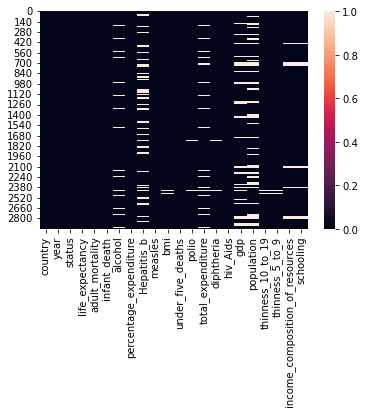

In [8]:
data = df.copy()
sns.heatmap(pd.isnull(data))
# Highlight if there is any null value

<AxesSubplot:>

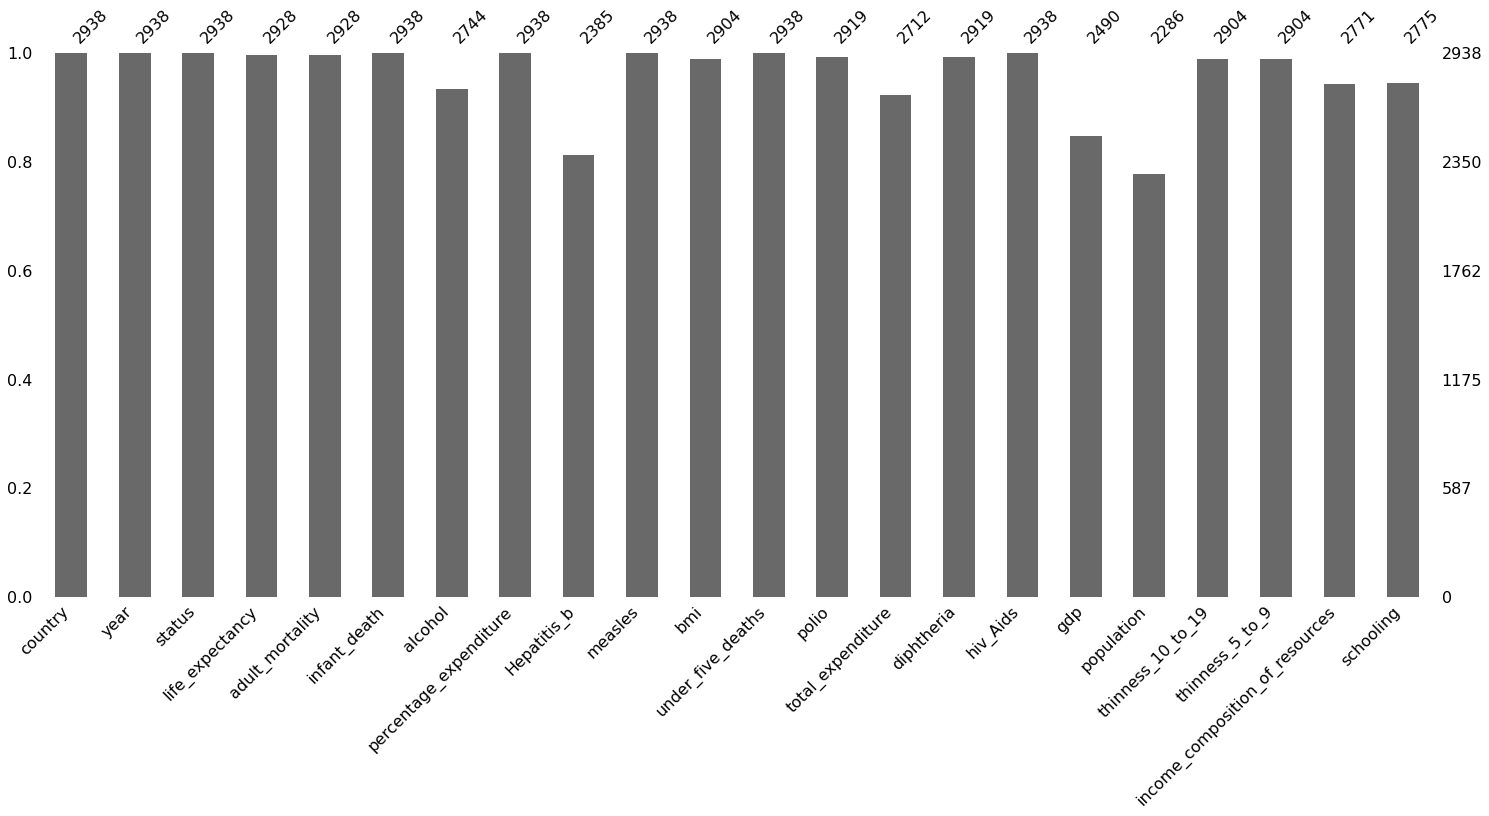

In [9]:
#Histogram of NaN
msno.bar(df)

In [10]:
#correlation between each pair of variables
corr_data=df.corr()
corr_data

year  life_expectancy  adult_mortality  \
year                             1.000000         0.170033        -0.079052   
life_expectancy                  0.170033         1.000000        -0.696359   
adult_mortality                 -0.079052        -0.696359         1.000000   
infant_death                    -0.037415        -0.196557         0.078756   
alcohol                         -0.052990         0.404877        -0.195848   
percentage_expenditure           0.031400         0.381864        -0.242860   
Hepatitis_b                      0.104333         0.256762        -0.162476   
measles                         -0.082493        -0.157586         0.031176   
bmi                              0.108974         0.567694        -0.387017   
under_five_deaths               -0.042937        -0.222529         0.094146   
polio                            0.094158         0.465556        -0.274823   
total_expenditure                0.090740         0.218086        -0.115281   
diphtheria                       0.134337         0.479495        -0.275131   
hiv_Aids                        -0.139741        -0.556556         0.523821   
gdp                              0.101620         0.461455        -0.296049   
population                       0.016969        -0.021538        -0.013647   
thinness_10_to_19               -0.047876        -0.477183         0.302904   
thinness_5_to_9                 -0.050929        -0.471584         0.308457   
income_composition_of_resources  0.243468         0.724776        -0.457626   
schooling                        0.209400         0.751975        -0.454612   

                                 infant_death   alcohol  \
year                                -0.037415 -0.052990   
life_expectancy                     -0.196557  0.404877   
adult_mortality                      0.078756 -0.195848   
infant_death                         1.000000 -0.115638   
alcohol                             -0.115638  1.000000   
percentage_expenditure              -0.085612  0.341285   
Hepatitis_b                         -0.223566  0.087549   
measles                              0.501128 -0.051827   
bmi                                 -0.227279  0.330408   
under_five_deaths                    0.996629 -0.112370   
polio                               -0.170689  0.221734   
total_expenditure                   -0.128616  0.296942   
diphtheria                          -0.175171  0.222020   
hiv_Aids                             0.025231 -0.048845   
gdp                                 -0.108427  0.354712   
population                           0.556801 -0.035252   
thinness_10_to_19                    0.465711 -0.428795   
thinness_5_to_9                      0.471350 -0.417414   
income_composition_of_resources     -0.145139  0.450040   
schooling                           -0.193720  0.547378   

                                 percentage_expenditure  Hepatitis_b  \
year                                           0.031400     0.104333   
life_expectancy                                0.381864     0.256762   
adult_mortality                               -0.242860    -0.162476   
infant_death                                  -0.085612    -0.223566   
alcohol                                        0.341285     0.087549   
percentage_expenditure                         1.000000     0.016274   
Hepatitis_b                                    0.016274     1.000000   
measles                                       -0.056596    -0.120529   
bmi                                            0.228700     0.150380   
under_five_deaths                             -0.087852    -0.233126   
polio                                          0.147259     0.486171   
total_expenditure                              0.174420     0.058280   
diphtheria                                     0.143624     0.611495   
hiv_Aids                                      -0.097857    -0.112675   
gdp                                            0.899373  

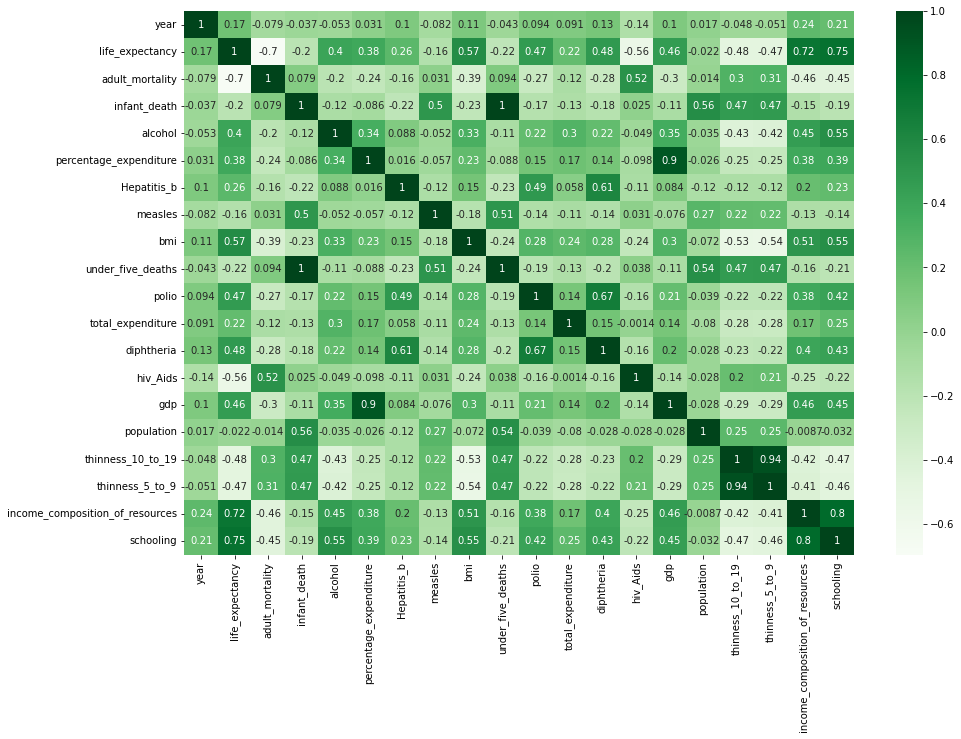

In [11]:
#visualization of correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


nan

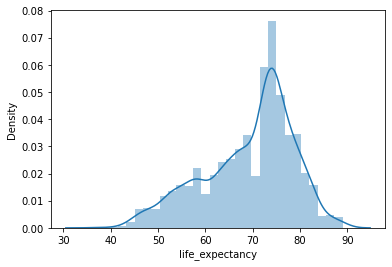

In [12]:
sns.distplot(data['life_expectancy'])
#Skewness value
scipy.stats.skew(data['life_expectancy'],axis=0)

# Data Preprocessing

Two methods were utilized to deal with **NaN values** in the dataset. 

The first method to deal with NaN.**(Drop)**

In [13]:
df=df.dropna()
df=df.drop([2933,2934,2935,2936,2937],axis=0)
df=df.replace("Developing",0)
df=df.replace("Developed",1)

<AxesSubplot:>

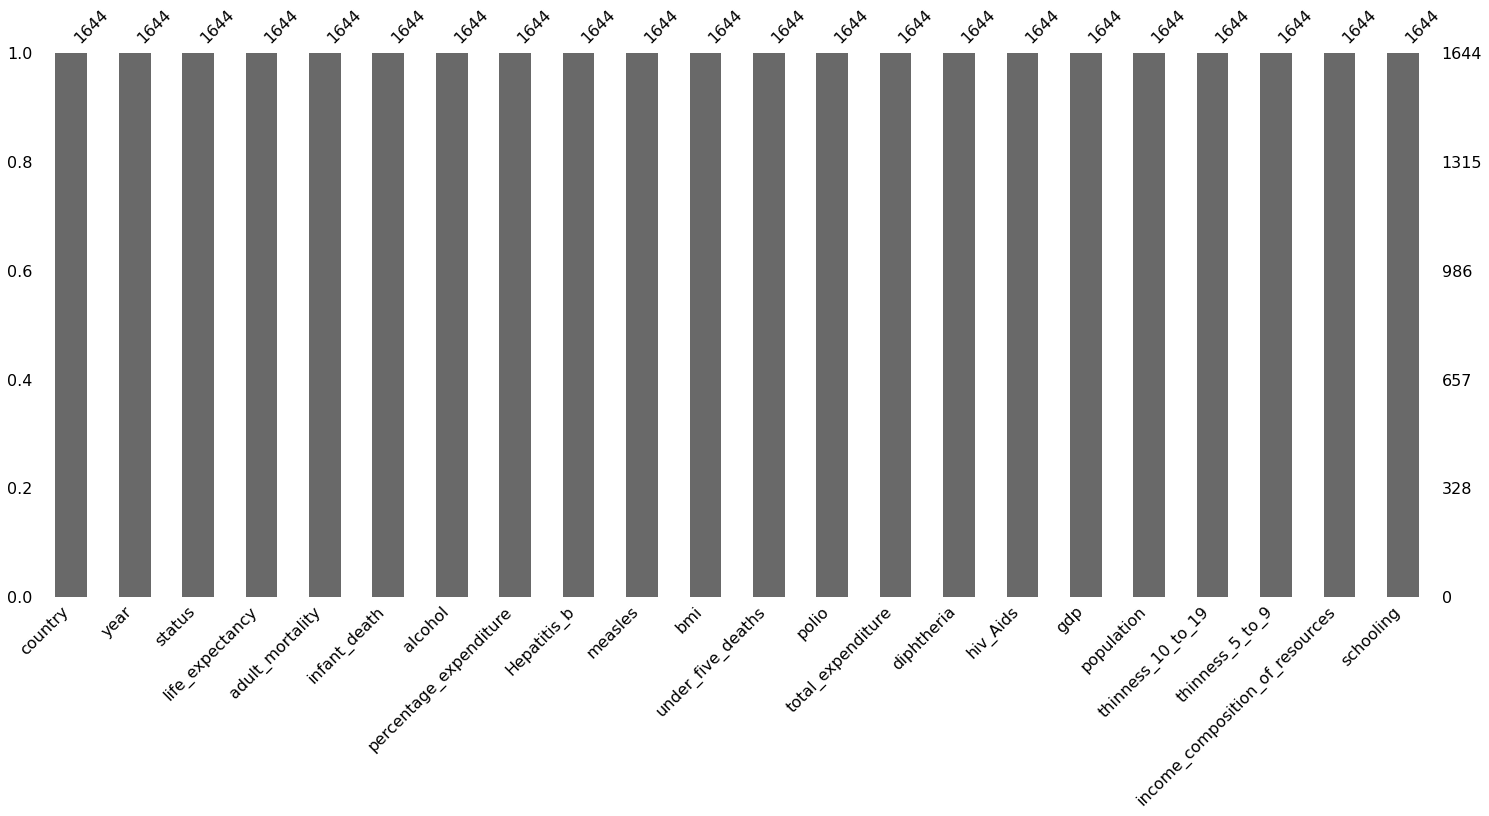

In [14]:
msno.bar(df)

The second method: **(1)filling with mean** and **(2) filling with values predicted by other feature which has high correlation with it**.

For features with few NaN values, we filled with **their means**:


**Life expectancy**

Adult Mortality

Polio**

Diphtheria

BMI

thinness 10-19 years

thinness 5-9 years

total expenditure

<AxesSubplot:>

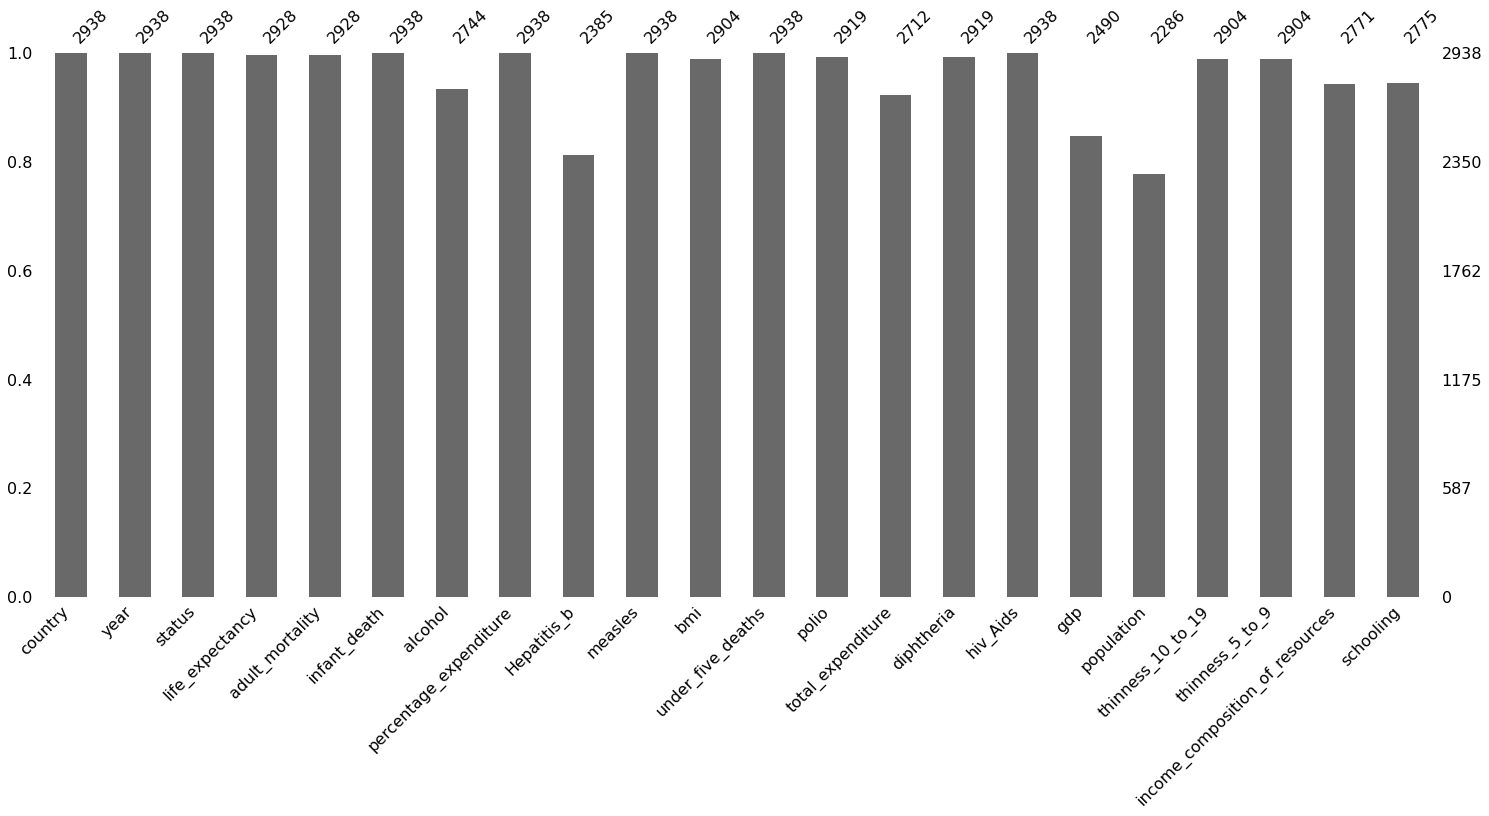

In [15]:
msno.bar(data)

In [16]:
data['life_expectancy']=data['life_expectancy'].fillna(value=data['life_expectancy'].mean())

data['adult_mortality']=data['adult_mortality'].fillna(value=data['adult_mortality'].mean())

data['polio']=data['polio'].fillna(value=data['polio'].mean())

data['diphtheria']=data['diphtheria'].fillna(value=data['diphtheria'].mean())

data['bmi']=data['bmi'].fillna(value=data['bmi'].mean())

data['thinness_10_to_19']=data['thinness_10_to_19'].fillna(value=data['thinness_10_to_19'].mean())

data['thinness_5_to_9']=data['thinness_5_to_9'].fillna(value=data['thinness_5_to_9'].mean())

data['total_expenditure']=data['total_expenditure'].fillna(value=data['total_expenditure'].mean())

In [17]:
# Now represent the null value quantitatively.
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df = pd.DataFrame({'Feature name':a,'No. of Nan':b})
null_df

Feature name  No. of Nan
0                           country           0
1                              year           0
2                            status           0
3                   life_expectancy           0
4                   adult_mortality           0
5                      infant_death           0
6                           alcohol         194
7            percentage_expenditure           0
8                       Hepatitis_b         553
9                           measles           0
10                              bmi           0
11                under_five_deaths           0
12                            polio           0
13                total_expenditure           0
14                       diphtheria           0
15                         hiv_Aids           0
16                              gdp         448
17                       population         652
18                thinness_10_to_19           0
19                  thinness_5_to_9           0
20  income_composition_of_resources         167
21                        schooling         163

We calculate the **correlation matrix** of the dataset and visualize it with a **heatmap**.(shown in basic information) The **deeper** the color in the heatmap, the **stronger** the correlation, and we can find the most correlated features more intuitively. Meanwhile, we also use the value of the correlation matrix to double check to ensure accuracy in order not to make mistakes due to the difficulty in distinguishing color nuances.

In [18]:
def fillna_lr(x,y):
    T=data[[x.name,y.name]].dropna()
    x_trans=np.array(T[x.name]).reshape(-1,1)
    y_trans=np.array(T[y.name]).reshape(-1,1)
    LR=LinearRegression()
    LR.fit(x_trans,y_trans)
    
    def impute_x(cols):
        x_=cols[0]
        y_=cols[1]
        if pd.isnull(x_):
            return float(LR.coef_*y_+LR.intercept_)
        else:
            return x_
    
    return data[[x.name,y.name]].apply(impute_x,axis=1)

In [19]:
data["alcohol"]=fillna_lr(data["alcohol"],data["schooling"]).fillna(value=data['alcohol'].mean())

data["schooling"]=fillna_lr(data["schooling"],data["alcohol"])

data["income_composition_of_resources"]=fillna_lr(data["income_composition_of_resources"],data["schooling"])

data['Hepatitis_b']=fillna_lr(data["Hepatitis_b"],data["diphtheria"])

data['gdp']=fillna_lr(data["gdp"],data["percentage_expenditure"])

data['population']=fillna_lr(data["population"],data["infant_death"])

<AxesSubplot:>

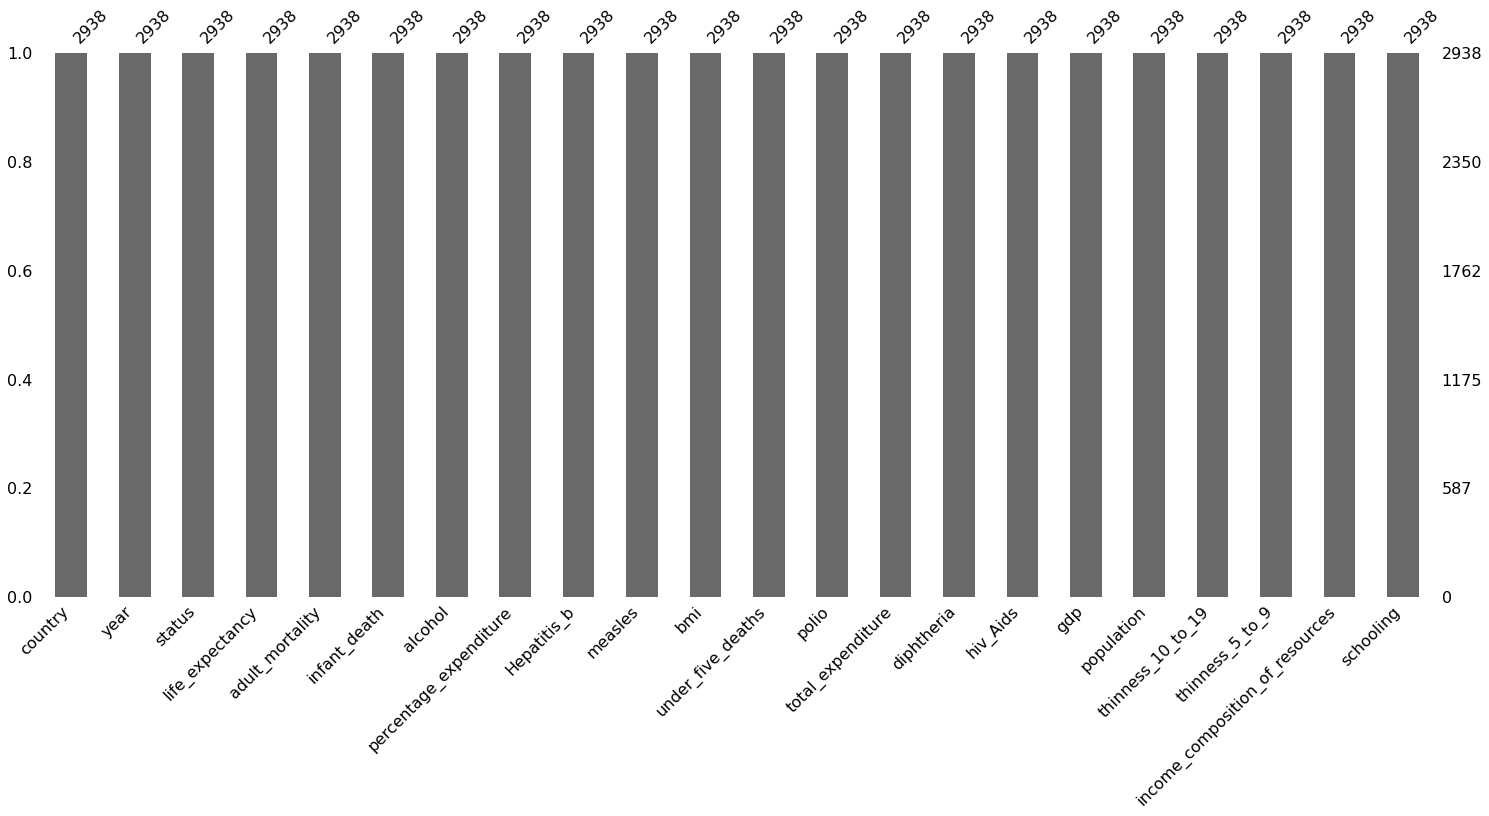

In [20]:
msno.bar(data)

# Feature selection

In [21]:
feature_original=df.columns.drop(["country","year","life_expectancy"])
feature_original

Index(['status', 'adult_mortality', 'infant_death', 'alcohol',
       'percentage_expenditure', 'Hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19', 'thinness_5_to_9',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

1. Deleting features with **high multicollinearity** with other features

In [22]:
X = df.drop(['life_expectancy','status','country','year'],axis=1)
# When VIF<10, there is no multicollinearity; 
# when 10<=VIF<100, there is strong multicollinearity, 
# when VIF>=100, there is serious multicollinearity
vif = [variance_inflation_factor(X.values, X.columns.get_loc(i)) for i in X.columns]

In [23]:
VIF=[]
for i in range(len(vif)):
    VIF.append((vif[i],X.columns[i]))
VIF=sorted(VIF,reverse=True)
VIF

[(222.33994320407922, 'infant_death'),
 (211.12696618167828, 'under_five_deaths'),
 (56.68074028238243, 'schooling'),
 (37.34299689943216, 'income_composition_of_resources'),
 (33.17531829468069, 'diphtheria'),
 (25.017764830849373, 'polio'),
 (17.435221108320185, 'Hepatitis_b'),
 (16.557572133899654, 'gdp'),
 (15.897386814271206, 'thinness_5_to_9'),
 (15.73426055907209, 'thinness_10_to_19'),
 (14.826838158971539, 'percentage_expenditure'),
 (8.287400705064108, 'bmi'),
 (8.113984813001512, 'total_expenditure'),
 (4.120114465991753, 'adult_mortality'),
 (4.075983701569795, 'alcohol'),
 (2.013873726341157, 'population'),
 (1.5958067343829767, 'hiv_Aids'),
 (1.5714402840807375, 'measles')]

[]

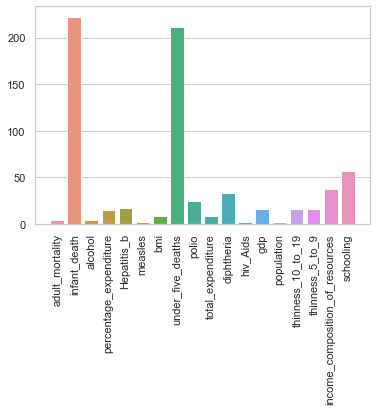

In [24]:
#visualization of VIF
sns.set(style="whitegrid")
ax = sns.barplot(x = X.columns, y=vif)
ax.set_xticklabels(['adult_mortality', 'infant_death', 'alcohol',
       'percentage_expenditure', 'Hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19', 'thinness_5_to_9',
       'income_composition_of_resources', 'schooling'], rotation=90)
ax.plot()

In [25]:
#Deleting "infant_death", which has extremely strong multicollinearity with other features 
feature_deleting=df.columns.drop(["country","year","life_expectancy","infant_death"])
feature_deleting

Index(['status', 'adult_mortality', 'alcohol', 'percentage_expenditure',
       'Hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv_Aids', 'gdp', 'population',
       'thinness_10_to_19', 'thinness_5_to_9',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

2. Using **mutual information** to rank features

In [26]:
#Standardization 
Std=StandardScaler()
X=df.drop(columns=["country","year","life_expectancy"]).values
y=df["life_expectancy"].values.reshape(-1,1)
X_std=Std.fit_transform(X)
y_std=Std.fit_transform(y).reshape(-1)

In [27]:
mutual_info=MI(X_std,y_std)
mut_info_fea=[]
for i in range(len(feature_original)):
    mut_info_fea.append((mutual_info[i],feature_original[i]))
    
mut_info_fea=sorted(mut_info_fea,reverse=True)
mut_info_fea

[(1.2659655920971224, 'adult_mortality'),
 (0.9199040340166436, 'income_composition_of_resources'),
 (0.8373606267244007, 'thinness_10_to_19'),
 (0.8285865741125931, 'thinness_5_to_9'),
 (0.7106500876993986, 'schooling'),
 (0.6691786674369875, 'bmi'),
 (0.4931078513152505, 'hiv_Aids'),
 (0.4418409301401933, 'alcohol'),
 (0.43734812573416715, 'under_five_deaths'),
 (0.42838828197081824, 'infant_death'),
 (0.4087438993960677, 'gdp'),
 (0.3585520883439477, 'percentage_expenditure'),
 (0.33655743269775673, 'total_expenditure'),
 (0.20297501900824377, 'polio'),
 (0.18873838928355946, 'diphtheria'),
 (0.17394377604515254, 'status'),
 (0.16813292321081885, 'population'),
 (0.16755290007405277, 'Hepatitis_b'),
 (0.12394474271886713, 'measles')]

In [28]:
#We selected ten highest ranking features here. And "infant_death" was dismissed because of its high multicollinearity.
feature_MI=['adult_mortality','income_composition_of_resources','thinness_5_to_9','thinness_10_to_19','schooling','bmi',
            'hiv_Aids','alcohol','under_five_deaths','gdp']

3. Using **boruta algorithm** to select important features. 

In [29]:
#Implementing Boruta
RF_r=RandomForestRegressor(max_depth=10)
boruta=BorutaPy(estimator=RF_r,n_estimators='auto',max_iter=1000)
boruta.fit(X_std,y_std)

feature_keep=feature_original[boruta.support_].to_list()
feature_tentative=feature_original[boruta.support_weak_].to_list()

print("The number of genes to be kept:",len(feature_keep))
print("The number of genes that is tentative:",len(feature_tentative))
print(feature_keep)

The number of genes to be kept: 16
The number of genes that is tentative: 0
['adult_mortality', 'infant_death', 'alcohol', 'percentage_expenditure', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19', 'thinness_5_to_9', 'income_composition_of_resources', 'schooling']


In [30]:
#We deleted "infant_death" here as well. 
feature_boruta=['adult_mortality', 'alcohol', 'percentage_expenditure', 'measles', 'bmi','under_five_deaths',
                'polio', 'total_expenditure', 'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19',
                'thinness_5_to_9','income_composition_of_resources', 'schooling']

1 income_composition_of_resources 0.5068671060967038
2 hiv_Aids 0.26332115931025835
3 adult_mortality 0.1439103194372827
4 schooling 0.011776767758816071
5 thinness_10_to_19 0.011068246848360708
6 total_expenditure 0.00908729197660305
7 alcohol 0.008492278815319823
8 thinness_5_to_9 0.007789385785188955
9 bmi 0.007333094695526579
10 under_five_deaths 0.004211704840643204
11 percentage_expenditure 0.004054370363775923
12 population 0.003965587459889895
13 measles 0.0039616478280000466
14 infant_death 0.003484841916709164
15 gdp 0.003305921126038908
16 polio 0.002668476951098141
17 Hepatitis_b 0.002342511561465311
18 diphtheria 0.001987289387452589


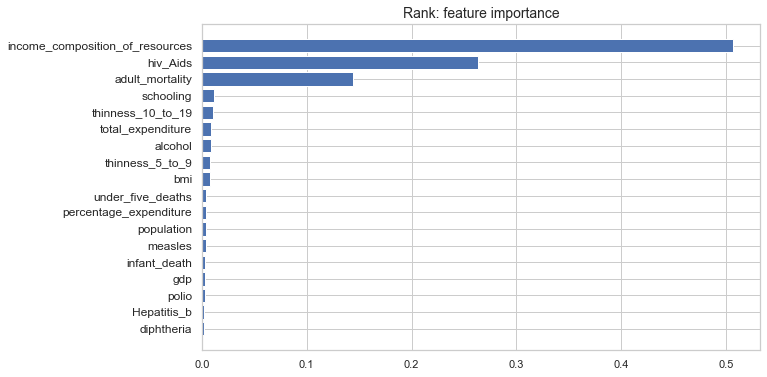

In [38]:
#Visualization of feature importance in Boruta algorithm 
X=df.drop(columns=["country","year","life_expectancy"])
feat_labels = X.columns[0:]
importances = rfr.feature_importances_[:19]
indices = np.argsort(importances)[::-1]
index_list = []
value_list = []
for f, j in zip(range(X.shape[1]-1), indices):
    index_list.append(feat_labels[j])
    value_list.append(importances[j])
    print(f+1, feat_labels[j], importances[j])
plt.figure(figsize=(10,6))
plt.barh(index_list[::-1], value_list[::-1])
plt.yticks(fontsize=12)
plt.title("Rank: feature importance", fontsize=14)
plt.show()

# Experiments

We first compared the performance of **two processing missing values** methods by Linear Regression model, then compared **three regression models** on the original feature set. The result showed that **random forest** had the best performance. 

In [31]:
data=data.replace("Developing",0)
data=data.replace("Developed",1)
X_=data.drop(columns=["country","year","life_expectancy"]).values
y_=data["life_expectancy"].values.reshape(-1,1)
X_std_=Std.fit_transform(X_)
y_std_=Std.fit_transform(y_).reshape(-1)

In [32]:
data.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_death                       0
alcohol                            0
percentage_expenditure             0
Hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_Aids                           0
gdp                                0
population                         0
thinness_10_to_19                  0
thinness_5_to_9                    0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [33]:
X_train_,X_test_,y_train_,y_test_=train_test_split(X_std_,y_std_,test_size=0.33,random_state=40)
LR=LinearRegression()
LR.fit(X_train_,y_train_)
score = LR.score(X_test_,y_test_)
y_prediction_ = LR.predict(X_test_)
mse = mean_squared_error(y_test_, y_prediction_)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.8049
RMSE value: 0.4298


In [34]:
#Using original features by linear regression
X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.33,random_state=40)
LR=LinearRegression()
LR.fit(X_train,y_train)
score = LR.score(X_test,y_test)
y_prediction = LR.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.8304
RMSE value: 0.4202


In [35]:
#Using original features by ridge regression 
ridge=RidgeCV(alphas=(0.1,1.0,10),cv=10)
ridge.fit(X_train,y_train)
score = ridge.score(X_test,y_test)
y_prediction = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.8304
RMSE value: 0.4202


In [36]:
#Using original features by random forest
rfr = RandomForestRegressor(random_state=40)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
score = rfr.score(X_test, y_test)
y_prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.9590
RMSE value: 0.2066


In [37]:
#Using original features by multilayer perceptrons
mlp = MLPRegressor(activation='logistic', hidden_layer_sizes=(2, 2), solver='sgd', max_iter=3000, random_state=40)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

Score: 0.8008
RMSE value: 0.4553


Then we used **random forest** to make prediction on other three feature sets.

In [40]:
#Using feature_deleting
X_del=df[feature_deleting]
X_del_std=Std.fit_transform(X_del)
X_train_del,X_test_del,y_train_del,y_test_del=train_test_split(X_del_std,y_std,test_size=0.33,random_state=40)
rfr.fit(X_train_del,y_train_del)
score = rfr.score(X_test_del,y_test_del)
y_prediction = rfr.predict(X_test_del)
mse = mean_squared_error(y_test_del, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.9588
RMSE value: 0.2071


In [41]:
#Using features selected by mutual information
X_MI=df[feature_MI]
X_MI_std=Std.fit_transform(X_MI)
X_train_MI,X_test_MI,y_train_MI,y_test_MI=train_test_split(X_MI_std,y_std,test_size=0.33,random_state=40)
rfr.fit(X_train_MI,y_train_MI)
score = rfr.score(X_test_MI,y_test_MI)
y_prediction = rfr.predict(X_test_MI)
mse = mean_squared_error(y_test_MI, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.9609
RMSE value: 0.2018


In [42]:
#Using features selected by Boruta algorithm
X_boruta=df[feature_boruta]
X_boruta_std=Std.fit_transform(X_boruta)
X_train_bo,X_test_bo,y_train_bo,y_test_bo=train_test_split(X_boruta_std,y_std,test_size=0.33,random_state=40)
rfr.fit(X_train_bo,y_train_bo)
score = rfr.score(X_test_bo,y_test_bo)
y_prediction = rfr.predict(X_test_bo)
mse = mean_squared_error(y_test_bo, y_prediction)
rmse = np.sqrt(mse)
print("R2 score: {:.4f}".format(score))
print("RMSE value: {:.4f}".format(rmse))

R2 score: 0.9597
RMSE value: 0.2047


# Visualization

The sample distribution of each variable column

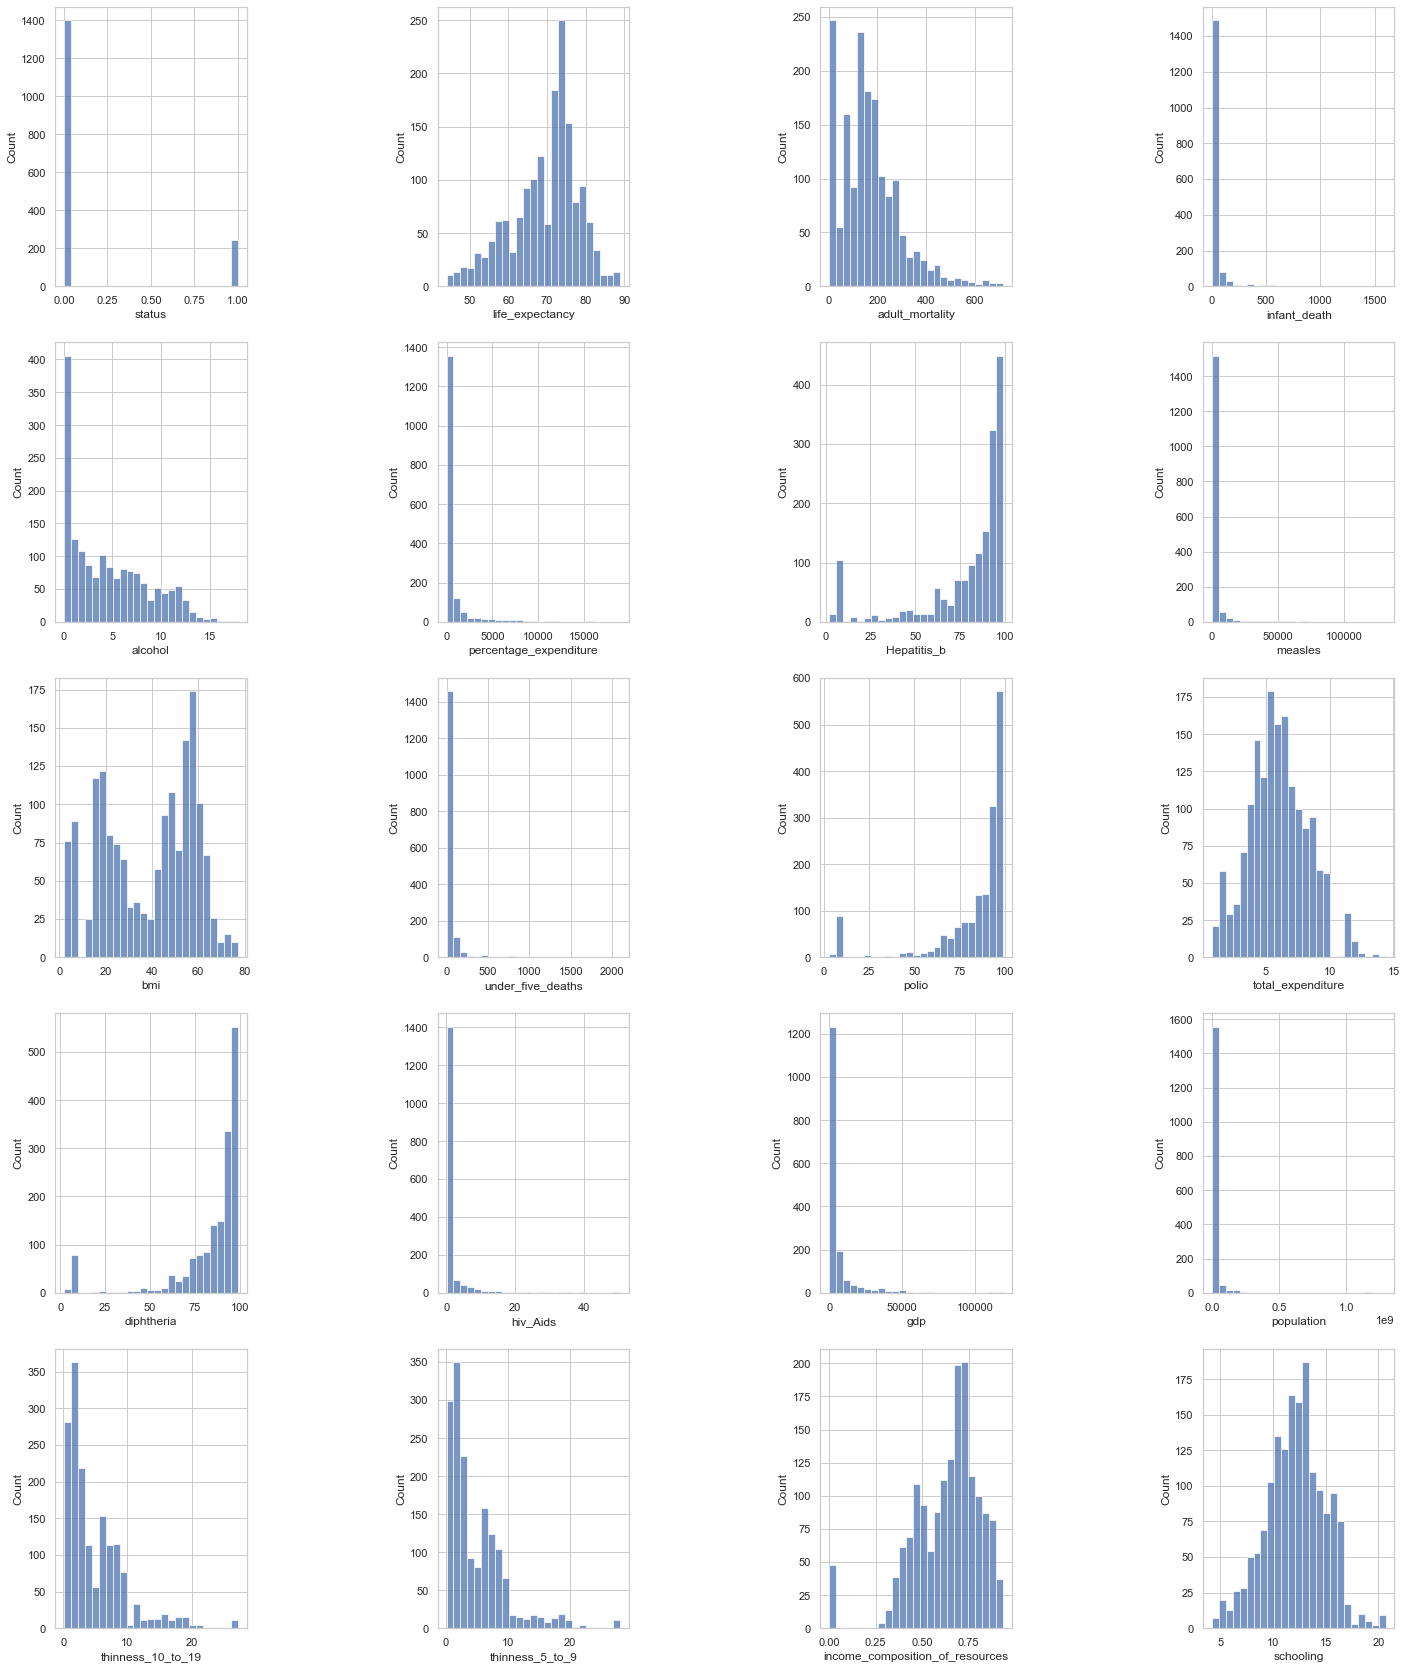

In [43]:
df_numeric = df.select_dtypes(include='number')

col_numeric = df_numeric.columns.drop('year')

#print(column_numeric)
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in col_numeric:
    plt.subplot(6,4,i)
    sns.histplot(data = df[col_name],  bins = 25)
    i +=1

Using the plotly package to visualize the dependent variable

In [44]:
fig = px.histogram(df, x = 'life_expectancy', template = 'plotly_dark')
fig.show()

Using **box plots** to look at the upper and lower bounds for developed and developing countries **(Check for outliers)**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='status', ylabel='life_expectancy'>

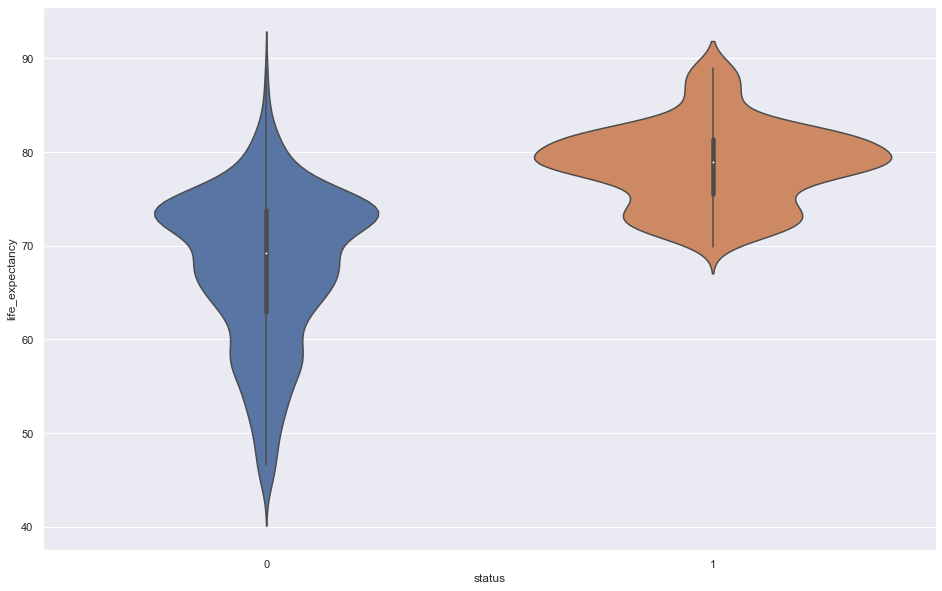

In [45]:
sns.set(rc={'figure.figsize':(16,10)})

sns.violinplot( df['status'],df['life_expectancy'])

The trend of changing in **global life expectancy** with increasing **years**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

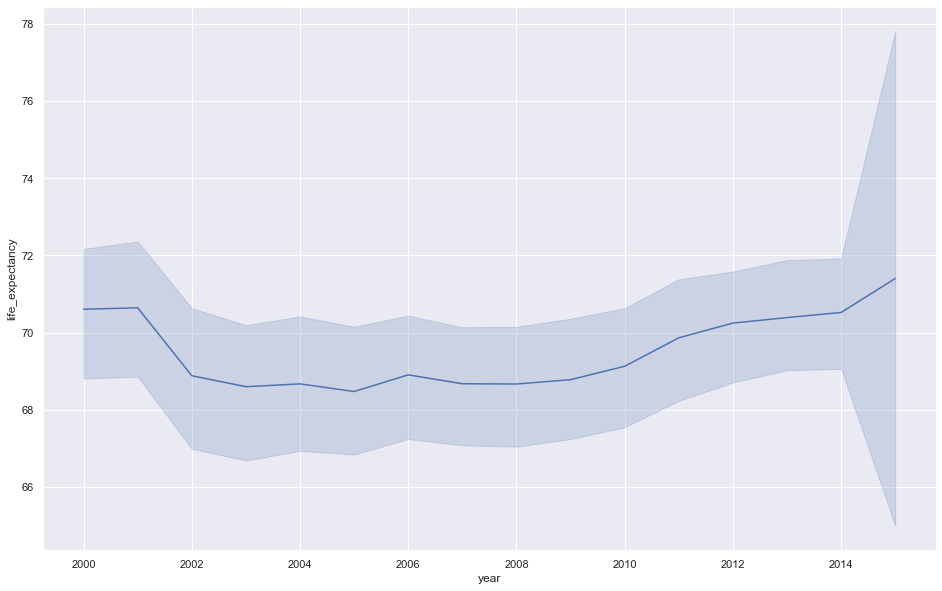

In [46]:
sns.lineplot( df['year'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **GDP**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='gdp', ylabel='life_expectancy'>

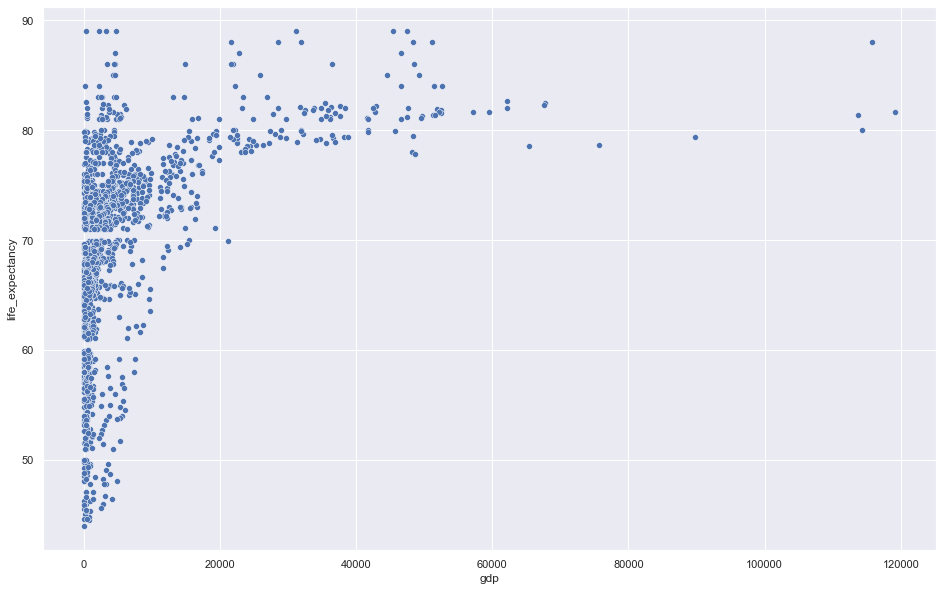

In [47]:
sns.scatterplot(df['gdp'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **schooling**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='schooling', ylabel='life_expectancy'>

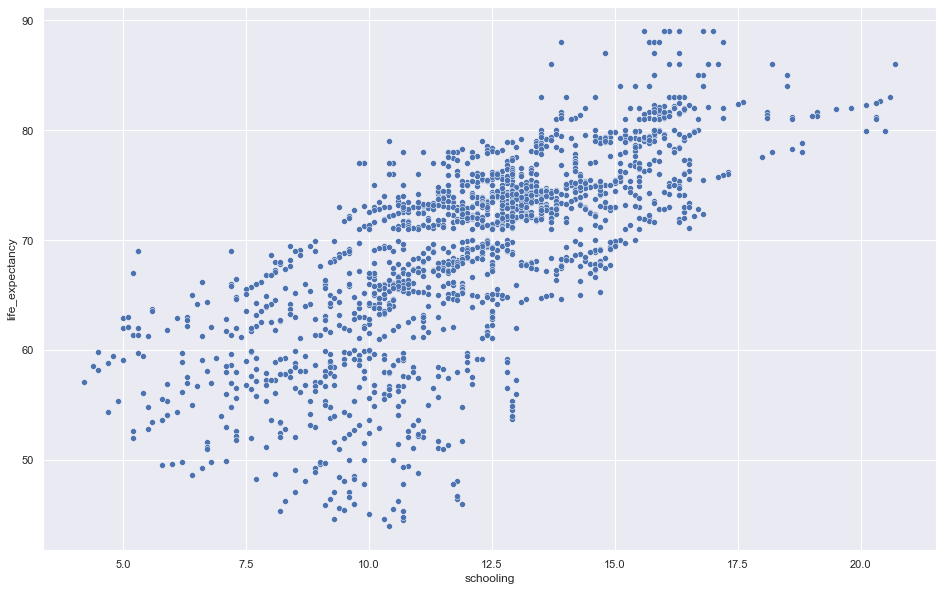

In [48]:
sns.scatterplot(df['schooling'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **expenditure percentage**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='percentage_expenditure', ylabel='life_expectancy'>

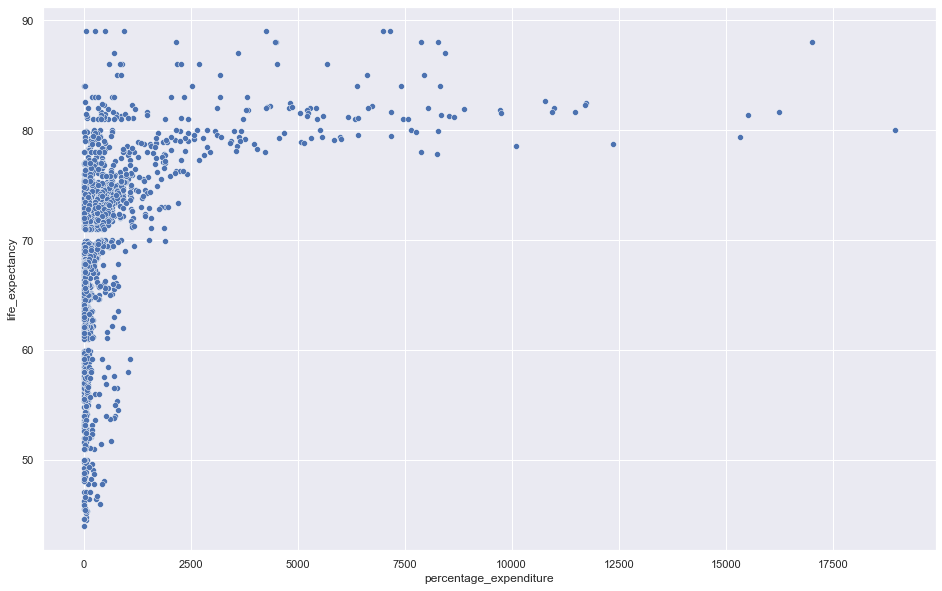

In [49]:
sns.scatterplot(df['percentage_expenditure'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **degrees of dreaking alcohol**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='alcohol', ylabel='life_expectancy'>

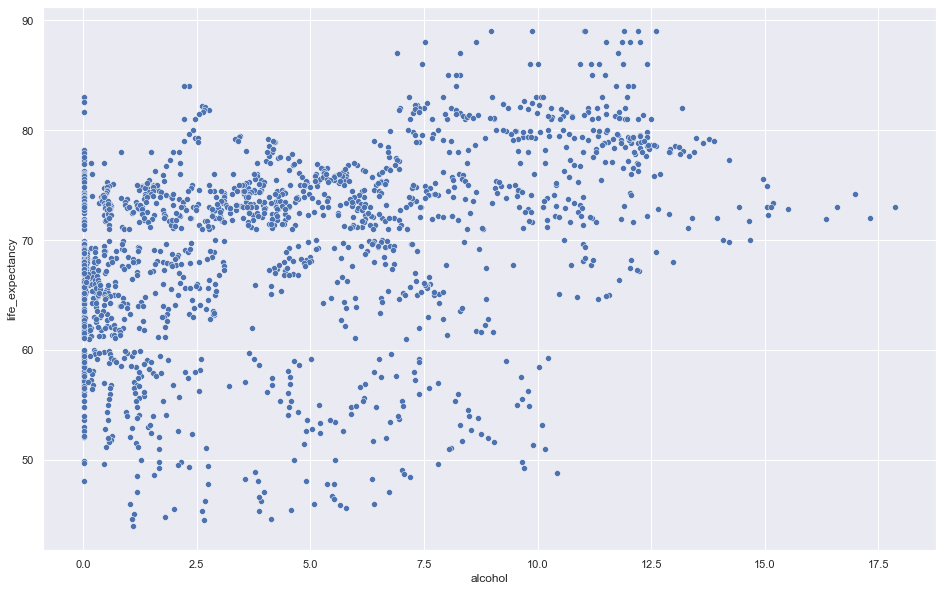

In [50]:
sns.scatterplot(df['alcohol'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **income composition of resources**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income_composition_of_resources', ylabel='life_expectancy'>

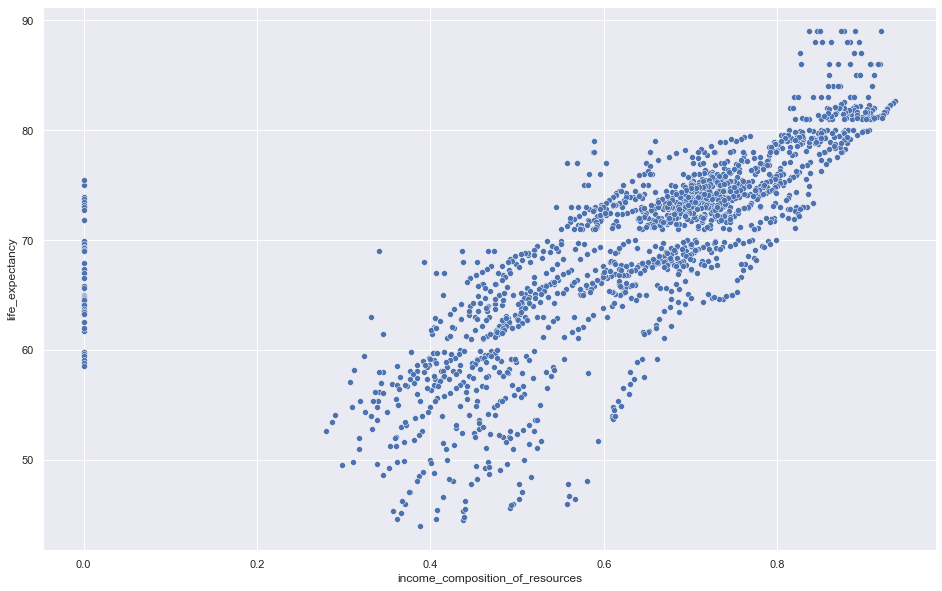

In [51]:
sns.scatterplot(df['income_composition_of_resources'],df['life_expectancy'])

The trend of changing in **global life expectancy** by different **BMI index**

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bmi', ylabel='life_expectancy'>

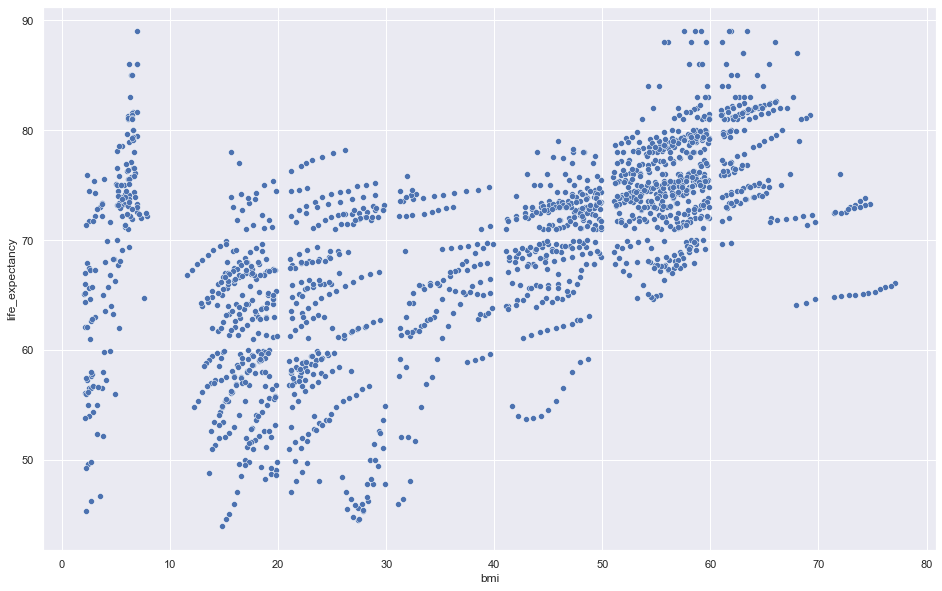

In [52]:
sns.scatterplot(df['bmi'],df['life_expectancy'])

Using plotly to observe the trend of **each country's life expectancy** by different **Income composition of resources**

In [53]:
px.scatter(df.sort_values(by='year'), x = 'life_expectancy', y = 'income_composition_of_resources', color = 'country',
          size = 'year',animation_frame = 'year', animation_group = 'country',template = 'plotly_dark',
           title = '<b>Life Expectancy Vs Income Composition of Resources in Countries')

Using plotly to observe the trend of **each country's life expectancy** by different **adult mortality**

In [54]:
px.scatter(df, x = 'life_expectancy', y = 'adult_mortality',
           color = 'country', template = 'plotly_dark',opacity = 0.6, size='year',
           title = '<b>Life Expectancy Vs Adult Mortality in Countries')

Using plotly to observe the 3D Perspectives of **each country's life expectancy** by different **adult mortality**

In [55]:
px.scatter_3d(df.sort_values(by='year'),y='adult_mortality',x='life_expectancy',
              z='income_composition_of_resources',template='plotly_dark',color='country',
              size='year')

# Extra work about analysing

We choose two countrys: **Malaysia** and **China** to observe the changes in their life expectancy in recent years, and based on our observations, we offer our **recommendations** on how to improve life expectancy in these two countries.

In [56]:
country = "Malaysia"

include_my = df[df['country'].values == country]
my_life = include_my
my_life

country  year  status  life_expectancy  adult_mortality  infant_death  \
1587  Malaysia  2014       0             74.8            126.0             4   
1588  Malaysia  2013       0             74.6            128.0             3   
1589  Malaysia  2012       0             74.5            129.0             3   
1590  Malaysia  2011       0             74.3             13.0             3   
1591  Malaysia  2010       0             74.1            131.0             3   
1592  Malaysia  2009       0             74.0            131.0             3   
1593  Malaysia  2008       0             73.8            132.0             3   
1594  Malaysia  2007       0             73.7            133.0             3   
1595  Malaysia  2006       0             73.6            134.0             3   
1596  Malaysia  2005       0             73.4            135.0             3   
1597  Malaysia  2004       0             73.2            137.0             3   
1598  Malaysia  2003       0             73.1            138.0             3   
1599  Malaysia  2002       0             72.9             14.0             4   
1600  Malaysia  2001       0             72.7            144.0             4   
1601  Malaysia  2000       0             72.4            149.0             4   

      alcohol  percentage_expenditure  Hepatitis_b  measles  ...  polio  \
1587     0.52              721.365543         96.0      221  ...   97.0   
1588     0.53              110.677971         96.0      195  ...   97.0   
1589     0.53              101.609245         97.0     1868  ...   97.0   
1590     0.51                9.230026         96.0     1569  ...   96.0   
1591     0.49               65.566597         96.0       73  ...   96.0   
1592     0.47              431.545247         96.0      153  ...   97.0   
1593     0.47              438.451921         97.0      334  ...   97.0   
1594     0.43              409.981252         96.0      394  ...   97.0   
1595     0.42              365.911398         95.0      564  ...   95.0   
1596     0.46              297.591383         96.0     1407  ...   96.0   
1597     0.49              315.663932         94.0     5729  ...   95.0   
1598     0.48              264.249613         95.0      632  ...   96.0   
1599     0.49              216.702948         95.0      408  ...   94.0   
1600     0.53              210.241700         95.0     2198  ...   95.0   
1601     0.54               23.371672         97.0     6187  ...   98.0   

      total_expenditure  diphtheria  hiv_Aids           gdp  population  \
1587               4.17        97.0       0.1  11183.961910    322817.0   
1588               4.20        97.0       0.1   1882.278420   2976724.0   
1589               4.10        97.0       0.1   1779.496410   2917456.0   
1590               3.89        96.0       0.1    145.126200  28635128.0   
1591               3.99        96.0       0.1    971.356987  28112289.0   
1592               3.97        97.0       0.1   7326.744435   2765383.0   
1593               3.47        97.0       0.1   8513.629541   2711169.0   
1594               3.61        97.0       0.1   7269.171140  26625845.0   
1595               3.65        95.0       0.1   6222.982955  26143566.0   
1596               3.29        96.0       0.1   5593.822995  25659393.0   
1597               3.74        95.0       0.1   4955.477743   2517419.0   
1598               3.95        96.0       0.1   4463.675893   2468873.0   
1599               3.40        94.0       0.1   4167.364387  24198811.0   
1600               3.40        96.0       0.1   3915.115460   2369897.0   
1601               3.40        98.0       0.1    445.174710   2318568.0   

      thinness_10_to_19  thinness_5_to_9  income_composition_of_resources  \
1587                7.6              7.4                            0.783   
1588                7.8              7.6                            0.779   
1589                7.9              7.7                            0.776   
1590            

In [57]:
country = "China"

include_cn = df[df['country'].values == country]
cn_life = include_cn
cn_life

country  year  status  life_expectancy  adult_mortality  infant_death  \
561   China  2014       0             75.8             86.0           171   
562   China  2013       0             75.6             88.0           185   
563   China  2012       0             75.4             89.0           201   
564   China  2011       0             75.2             91.0           215   
565   China  2010       0             75.0             92.0           231   
566   China  2009       0             74.9             93.0           248   
567   China  2008       0             74.5             97.0           266   
568   China  2007       0             74.4             96.0           285   
569   China  2006       0             74.2             98.0           307   
570   China  2005       0             73.9             99.0           332   
571   China  2004       0             73.5             11.0           360   
572   China  2003       0             73.1             13.0           391   
573   China  2002       0             72.7             16.0           422   
574   China  2001       0             72.2             11.0           457   
575   China  2000       0             71.7            115.0           490   

     alcohol  percentage_expenditure  Hepatitis_b  measles  ...  polio  \
561     5.78              109.874390         99.0    52628  ...   99.0   
562     5.79                9.955532         99.0    26883  ...   99.0   
563     5.74               94.434457         99.0     6183  ...   99.0   
564     5.63               91.267498         99.0     9943  ...   99.0   
565     5.75                5.660755         99.0    38159  ...   99.0   
566     4.88               50.283489         99.0    52461  ...   99.0   
567     4.27               39.225097         95.0   131441  ...   99.0   
568     3.88              312.662482         92.0   109023  ...   94.0   
569     3.28               29.743430         91.0    99602  ...   94.0   
570     2.92              171.659603         84.0   124219  ...   87.0   
571     3.04                1.586685         79.0    70549  ...   87.0   
572     2.96              122.936535         75.0    71879  ...   87.0   
573     2.91              106.359036          7.0    58341  ...   86.0   
574     2.84               14.230645         65.0    88962  ...   86.0   
575     3.06               17.460574          6.0    71093  ...   86.0   

     total_expenditure  diphtheria  hiv_Aids          gdp  population  \
561               5.55        99.0       0.1  7683.523800    136427.0   
562               5.39        99.0       0.1   777.775940    135738.0   
563               5.26        99.0       0.1  6337.882993    135695.0   
564               5.30        99.0       0.1  5633.796160    134413.0   
565               4.89        99.0       0.1   456.512487    133775.0   
566               5.80        99.0       0.1  3838.434292    133126.0   
567               4.59        97.0       0.1  3471.247547   1324655.0   
568               4.32        93.0       0.1  2695.366223   1317885.0   
569               4.52        93.0       0.1   299.229676     13112.0   
570               4.66        87.0       0.1  1753.417800     13372.0   
571               4.72        87.0       0.1   158.668462    129675.0   
572               4.82        86.0       0.1  1288.642924     12884.0   
573               4.79        86.0       0.1  1148.585700      1284.0   
574               4.56        86.0       0.1   153.182400    127185.0   
575               4.60        85.0       0.1   959.372181   1262645.0   

     thinness_10_to_19  thinness_5_to_9  income_composition_of_resources  \
561                3.7              3.0                            0.723   
562                3.8              3.2                            0.713   
563                3.9              3.3                            0.703   
564                4.1              3.5                            0.700   
565                4.2              3

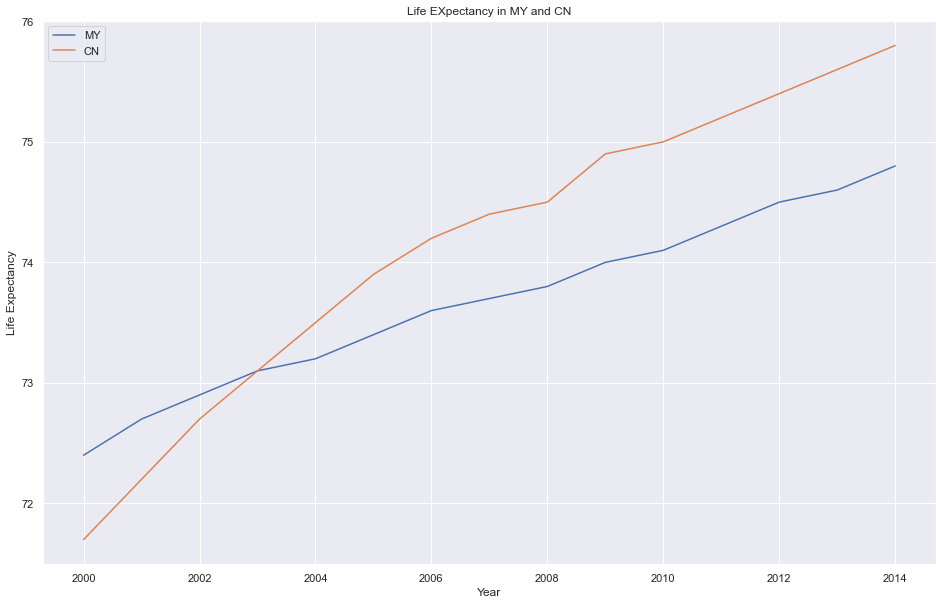

In [58]:
plt.plot(my_life.year, my_life['life_expectancy'])
plt.plot(cn_life.year, cn_life['life_expectancy'])
plt.legend(['MY', 'CN'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life EXpectancy in MY and CN')
plt.show()

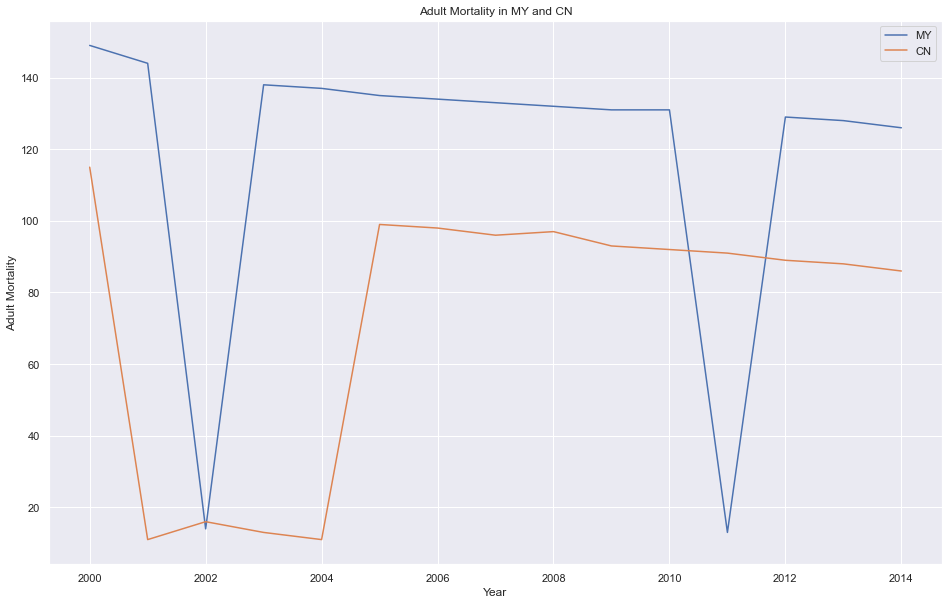

In [59]:
plt.plot(my_life.year, my_life['adult_mortality'])
plt.plot(cn_life.year, cn_life['adult_mortality'])
plt.legend(['MY', 'CN'])
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality in MY and CN')
plt.show()

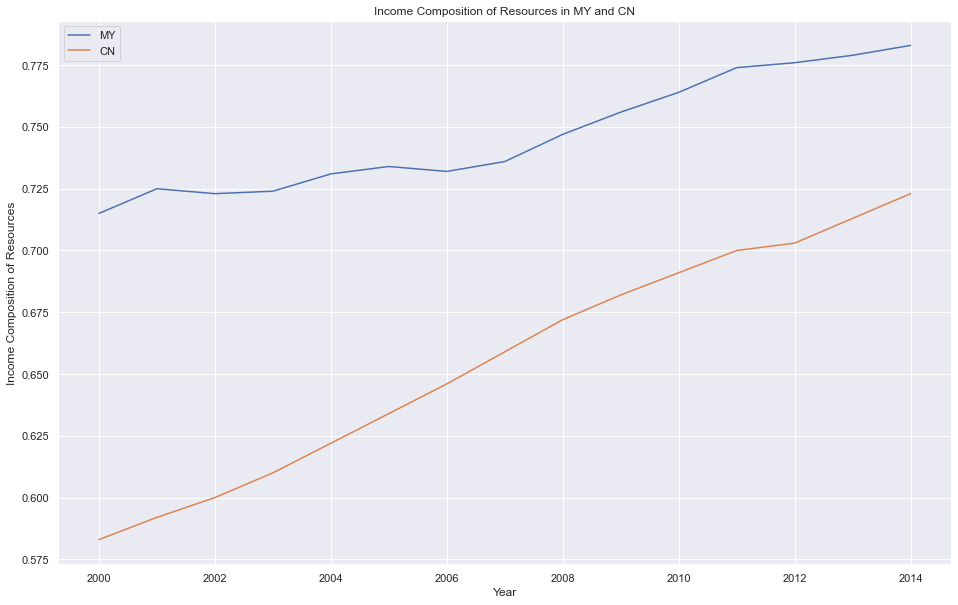

In [60]:
plt.plot(my_life.year, my_life['income_composition_of_resources'])
plt.plot(cn_life.year, cn_life['income_composition_of_resources'])
plt.legend(['MY', 'CN'])
plt.xlabel('Year')
plt.ylabel('Income Composition of Resources')
plt.title('Income Composition of Resources in MY and CN')
plt.show()

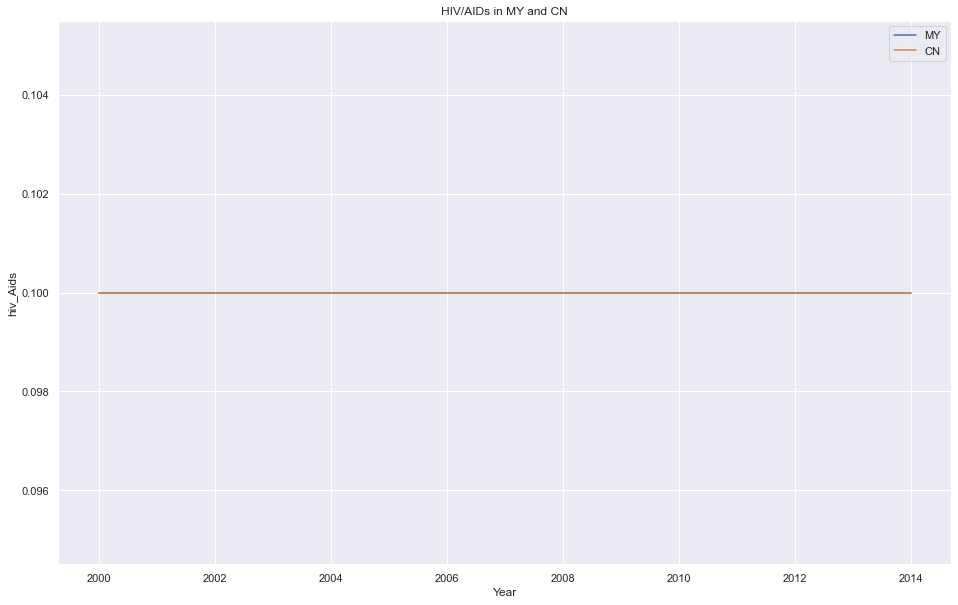

In [61]:
plt.plot(my_life.year, my_life['hiv_Aids'])
plt.plot(cn_life.year, cn_life['hiv_Aids'])
plt.legend(['MY', 'CN'])
plt.xlabel('Year')
plt.ylabel('hiv_Aids')
plt.title('HIV/AIDs in MY and CN')
plt.show()

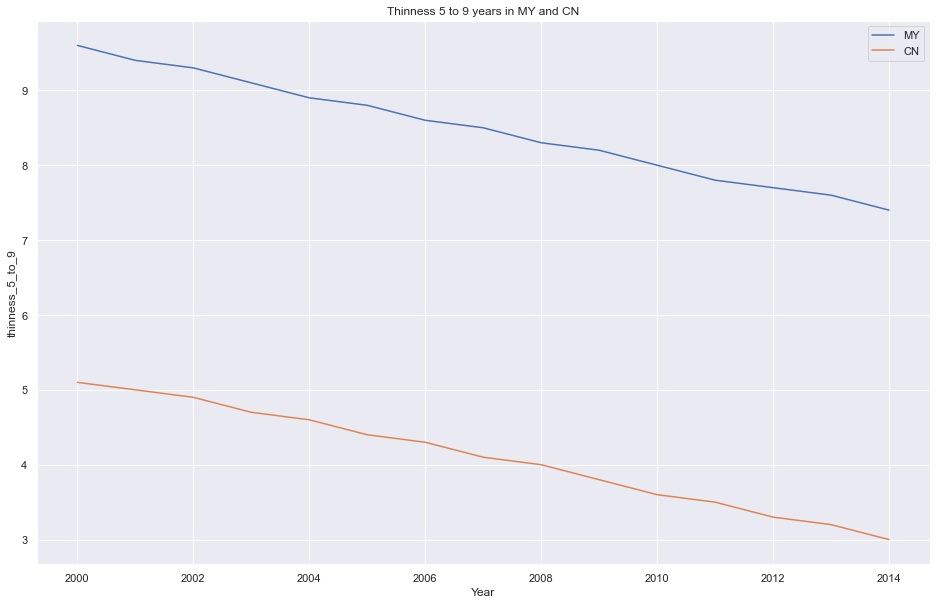

In [62]:
plt.plot(my_life.year, my_life['thinness_5_to_9'])
plt.plot(cn_life.year, cn_life['thinness_5_to_9'])
plt.legend(['MY', 'CN'])
plt.xlabel('Year')
plt.ylabel('thinness_5_to_9')
plt.title('Thinness 5 to 9 years in MY and CN')
plt.show()

Finally, we use the **Time series analysis(Regression)** to see the trend of **Malaysian life expectancy** in future. 

1.Using **AutoRegression model** when the data is **Non-stationary**

C:\Users\BiXY\AppData\Local\Temp\ipykernel_32644\216259208.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BiXY\AppData\Local\Temp\ipykernel_32644\216259208.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

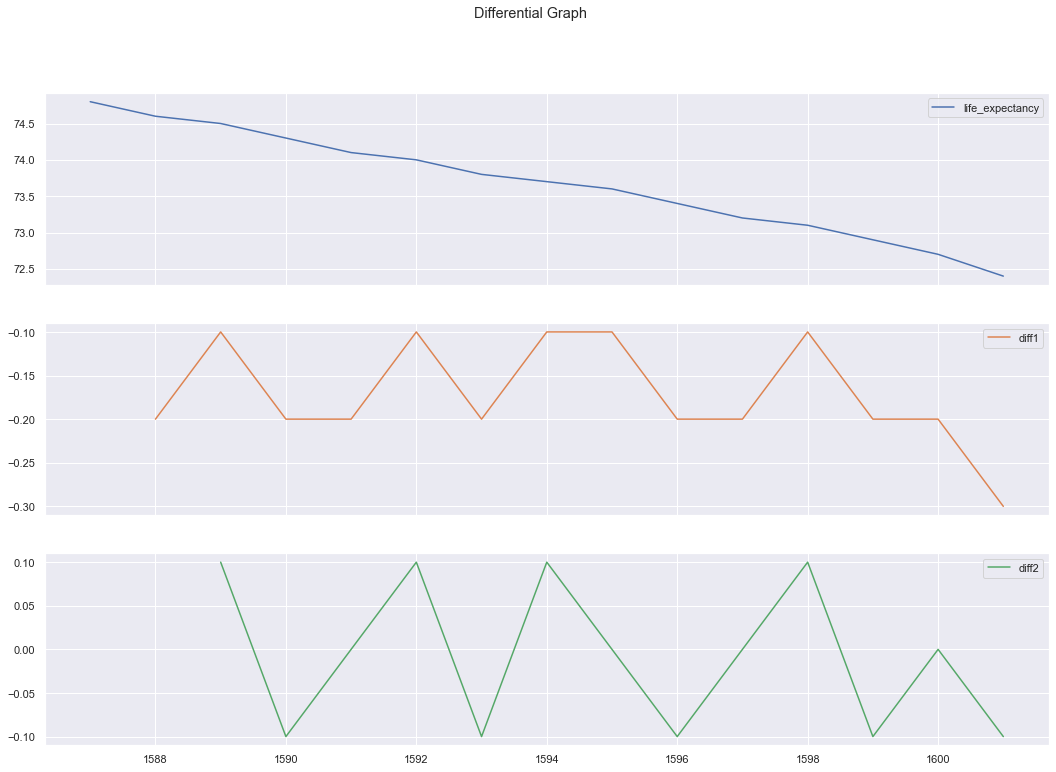

In [63]:
my = my_life
my["diff1"] = my["life_expectancy"].diff(1).dropna()
my["diff2"] = my["diff1"].diff(1).dropna()
my1 = my.loc[:,["life_expectancy","diff1","diff2"]]
my1.plot(subplots=True, figsize=(18, 12),title="Differential Graph")

Relying entirely on the judgment of the naked eye and the experience of the judge, different people seeing the same graph are likely to give different judgments. Therefore we need a more convincing and objective statistical method to help us test the smoothness of the time series, and this method, is the **unit root test**.

In [64]:
X = my['life_expectancy'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

if result[0] < result[4]["5%"]:
    print("Time Series is Stationaty")
else:
    print("Time Series is Non-Stationary")

ADF Statistic: 1.152924
p-value: 0.995644
Critical Values: 
	1%: -4.012
	5%: -3.104
	10%: -2.691
Time Series is Non-Stationary


In [65]:
X = my.diff1.dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

if result[0] < result[4]["5%"]:
    print("Time Series is Stationaty")
else:
    print("Time Series is Non-Stationary")

ADF Statistic: -3.161562
p-value: 0.022320
Critical Values: 
	1%: -4.069
	5%: -3.127
	10%: -2.702
Time Series is Stationaty


Determining whether the sequence is a **non-white noise sequence**

In [66]:
acorr_ljungbox(my.diff1.dropna(), lags = [i for i in range(1,12)],boxpierce=True)

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.190121   0.662816  0.154474   0.694296
2   0.264269   0.876223  0.210084   0.900287
3   0.587820   0.899215  0.432526   0.933444
4   0.619852   0.960832  0.452546   0.977953
5   0.620292   0.987055  0.452793   0.993750
6   0.624740   0.995974  0.455017   0.998344
7   3.974221   0.782742  1.920415   0.964113
8   3.984767   0.858495  1.924370   0.983243
9   4.035385   0.909068  1.940188   0.992378
10  4.039339   0.945555  1.941176   0.996771
11  4.229156   0.962728  1.976767   0.998576

Selecting the appropriate AutoRegression(Linear Regression) and ARIMA model, i.e., the appropriate p,q in the ARIMA model.
In the first step we have to check the autocorrelation and partial autocorrelation plots of the smooth time series first.

Unit Root Test:

(-3.1615621317827003, 0.022320237483000212, 0, 13, {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}, -16.82832915023576)


C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



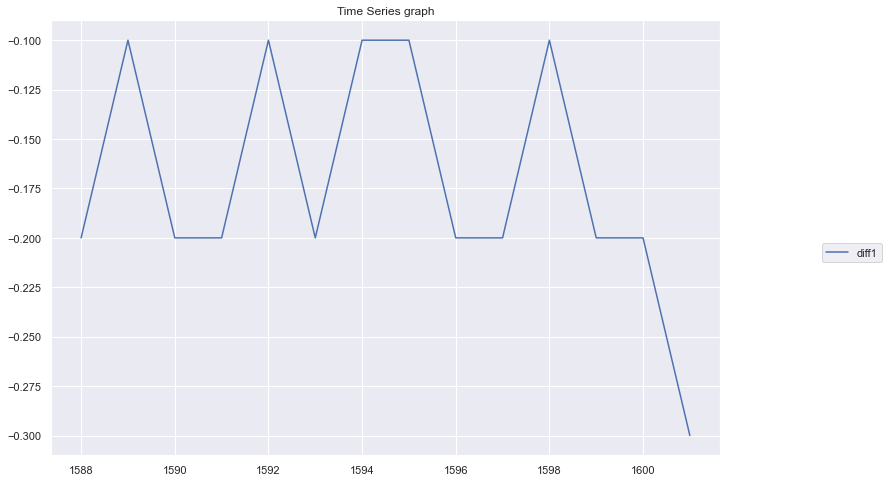

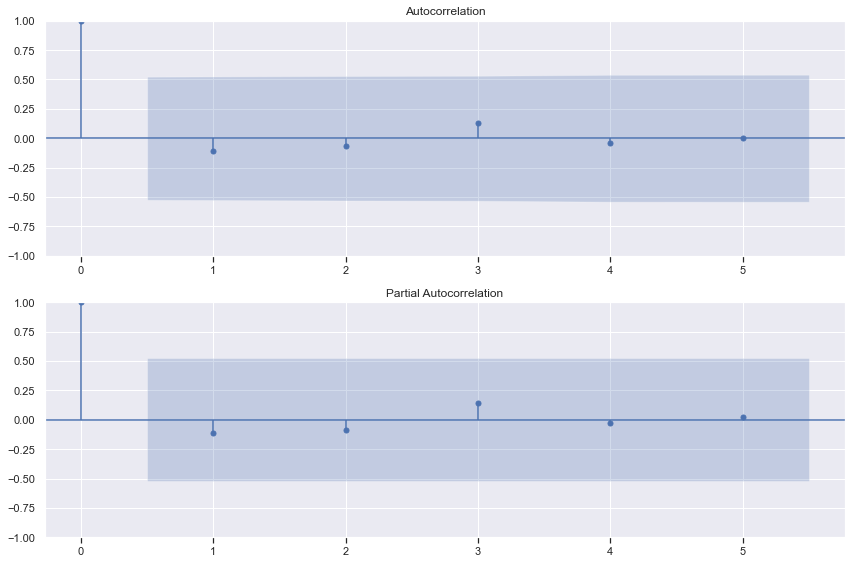

In [67]:
def draw_acf_pacf(data):
    """
    Input the data of ACF\PACF,
    my["diff1"]
    """
    
    #Smoothness test of the model
    """Time Series graph"""
    data.plot(figsize=(12,8))
    plt.legend(bbox_to_anchor=(1.25, 0.5))
    plt.title("Time Series graph")
    fig = plt.figure(figsize=(12,8))     
    """Unit Root Test"""
    print("Unit Root Test:\n")
    print(adfuller(data))    
        
    """ACF"""
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(data, lags=5,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    """PACF"""
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(data, lags=5, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
draw_acf_pacf(my.diff1.dropna())   

In [68]:
my["pred_life_expectancy"]  = df["life_expectancy"].shift()
my["pred_life_expectancy"]

C:\Users\BiXY\AppData\Local\Temp\ipykernel_32644\3099949619.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1587    44.0
1588    74.8
1589    74.6
1590    74.5
1591    74.3
1592    74.1
1593    74.0
1594    73.8
1595    73.7
1596    73.6
1597    73.4
1598    73.2
1599    73.1
1600    72.9
1601    72.7
Name: pred_life_expectancy, dtype: float64

In [69]:
my.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_death', 'alcohol', 'percentage_expenditure', 'Hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19',
       'thinness_5_to_9', 'income_composition_of_resources', 'schooling',
       'diff1', 'diff2', 'pred_life_expectancy'],
      dtype='object')

In [70]:
my_ = my[['country', 'year','life_expectancy','diff1','diff2','pred_life_expectancy']]
my_.year = pd.to_datetime(my.year,format = '%Y')
my_

C:\Users\BiXY\AppData\Local\Temp\ipykernel_32644\3927597424.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country       year  life_expectancy  diff1         diff2  \
1587  Malaysia 2014-01-01             74.8    NaN           NaN   
1588  Malaysia 2013-01-01             74.6   -0.2           NaN   
1589  Malaysia 2012-01-01             74.5   -0.1  1.000000e-01   
1590  Malaysia 2011-01-01             74.3   -0.2 -1.000000e-01   
1591  Malaysia 2010-01-01             74.1   -0.2  0.000000e+00   
1592  Malaysia 2009-01-01             74.0   -0.1  1.000000e-01   
1593  Malaysia 2008-01-01             73.8   -0.2 -1.000000e-01   
1594  Malaysia 2007-01-01             73.7   -0.1  1.000000e-01   
1595  Malaysia 2006-01-01             73.6   -0.1 -1.421085e-14   
1596  Malaysia 2005-01-01             73.4   -0.2 -1.000000e-01   
1597  Malaysia 2004-01-01             73.2   -0.2 -1.421085e-14   
1598  Malaysia 2003-01-01             73.1   -0.1  1.000000e-01   
1599  Malaysia 2002-01-01             72.9   -0.2 -1.000000e-01   
1600  Malaysia 2001-01-01             72.7   -0.2 -1.421085e-14   
1601  Malaysia 2000-01-01             72.4   -0.3 -1.000000e-01   

      pred_life_expectancy  
1587                  44.0  
1588                  74.8  
1589                  74.6  
1590                  74.5  
1591                  74.3  
1592                  74.1  
1593                  74.0  
1594                  73.8  
1595                  73.7  
1596                  73.6  
1597                  73.4  
1598                  73.2  
1599                  73.1  
1600                  72.9  
1601                  72.7

In [71]:
my_.dropna(inplace=True)
y = my_.life_expectancy.values
X = my_.pred_life_expectancy.values

C:\Users\BiXY\AppData\Local\Temp\ipykernel_32644\2310881213.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)

[0.98966942] 0.6136363636361182


In [74]:
y_pred = lr.predict(X_test)
y_pred

array([72.95847107, 72.76053719, 72.56260331])

Visualization of predicted and Actual value

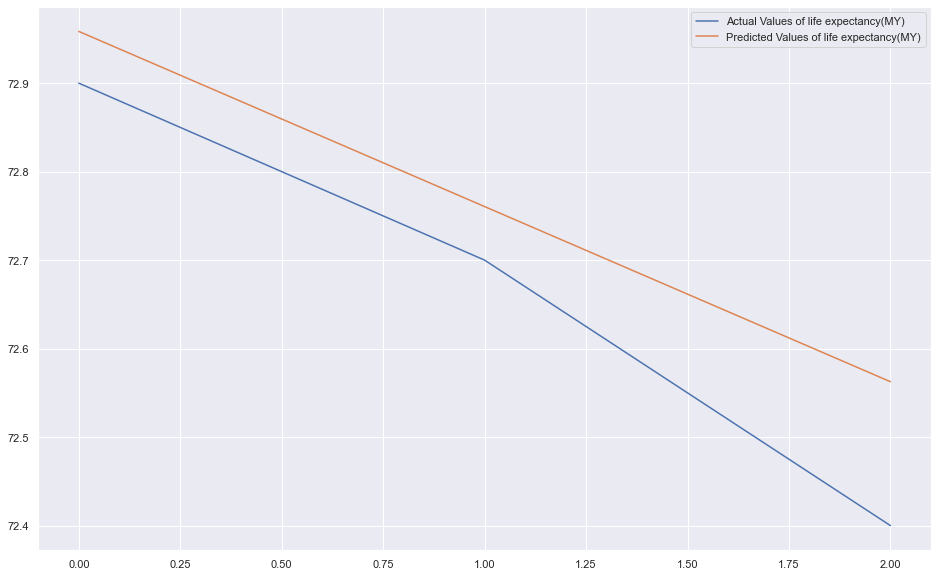

In [75]:
plt.plot(y_test[-10:], label="Actual Values of life expectancy(MY)")
plt.plot(y_pred[-10:], label="Predicted Values of life expectancy(MY)")
plt.legend()
plt.show()

In [76]:
returns = (my[['life_expectancy']].pct_change()*100)
returns.tail()
# Estimate and ARMA model using statsmodels (use order=(1,1,0))
model = sm.tsa.arima.ARIMA(returns, order=(1,1,0))
result = model.fit()

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\BiXY\anaconda3\envs\mmcv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [77]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        life_expectancy   No. Observations:                   15
Model:                 ARIMA(1, 1, 0)   Log Likelihood                   3.797
Date:                Tue, 27 Dec 2022   AIC                             -3.594
Time:                        08:16:24   BIC                             -2.316
Sample:                             0   HQIC                            -3.712
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5147      0.365     -1.409      0.159      -1.230       0.201
sigma2         0.0096      0.008      1.201      0.230      -0.006       0.025
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.39   Prob(JB):                         0.52
Heteroskedasticity (H):               1.30   Skew:                             0.37
Prob(H) (two-sided):                  0.78   Kurtosis:                         1.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""